In [10]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2)

In [11]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28,28,1)))

In [12]:
model.add(keras.layers.MaxPooling2D(2))

In [13]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu',
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [14]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 100)              

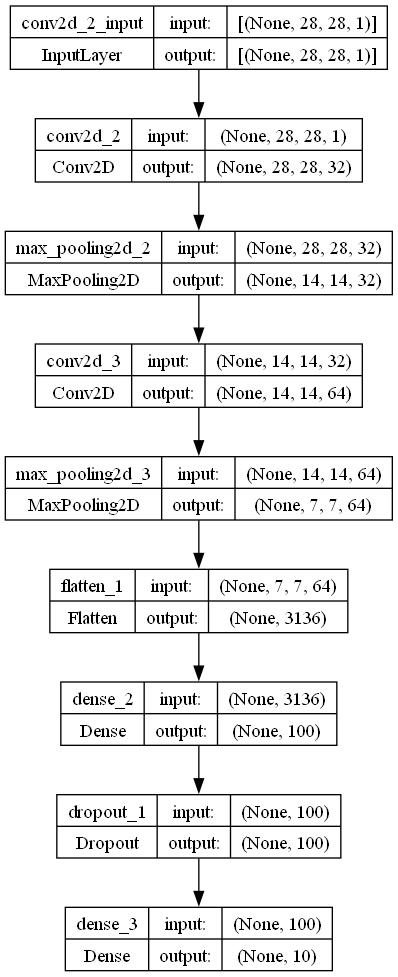

In [16]:
keras.utils.plot_model(model, show_shapes=True)

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')


checkpoint_cb = keras.callbacks.ModelCheckpoint('h5/best-cnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.5240 - accuracy: 0.8125 - val_loss: 0.3278 - val_accuracy: 0.8843
Epoch 2/20
  11/1500 [..............................] - ETA: 15s - loss: 0.4412 - accuracy: 0.8494

C:\Users\gyeol\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 16s 11ms/step - loss: 0.3425 - accuracy: 0.8768 - val_loss: 0.2838 - val_accuracy: 0.8939
Epoch 3/20
1500/1500 [==============================] - 16s 11ms/step - loss: 0.2899 - accuracy: 0.8940 - val_loss: 0.2596 - val_accuracy: 0.9081
Epoch 4/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.2555 - accuracy: 0.9063 - val_loss: 0.2437 - val_accuracy: 0.9122
Epoch 5/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.2333 - accuracy: 0.9137 - val_loss: 0.2273 - val_accuracy: 0.9173
Epoch 6/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.2113 - accuracy: 0.9229 - val_loss: 0.2264 - val_accuracy: 0.9202
Epoch 7/20
1500/1500 [==============================] - 16s 11ms/step - loss: 0.1929 - accuracy: 0.9288 - val_loss: 0.2370 - val_accuracy: 0.9178
Epoch 8/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.1803 - accuracy: 0.9315 - val_loss: 0.2368 - val_accura

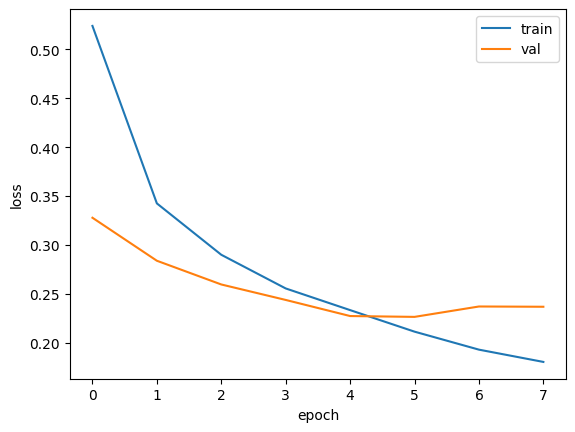

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [19]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 4ms/step - loss: 0.2264 - accuracy: 0.9202


[0.2264077514410019, 0.9201666712760925]

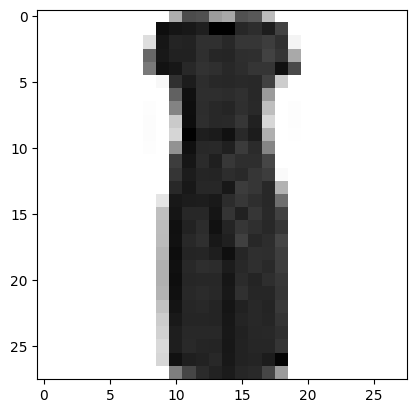

In [20]:
plt.imshow(val_scaled[500].reshape(28, 28), cmap='gray_r')
plt.show()

In [21]:
preds = model.predict(val_scaled[500:501])
print(preds)

1/1 [==============================] - 0s 55ms/step
[[1.09333975e-07 2.03909210e-08 1.20105472e-08 9.99999523e-01
  3.30316226e-07 4.65974394e-12 2.96262588e-08 1.13159400e-13
  2.38690090e-09 2.19815993e-14]]


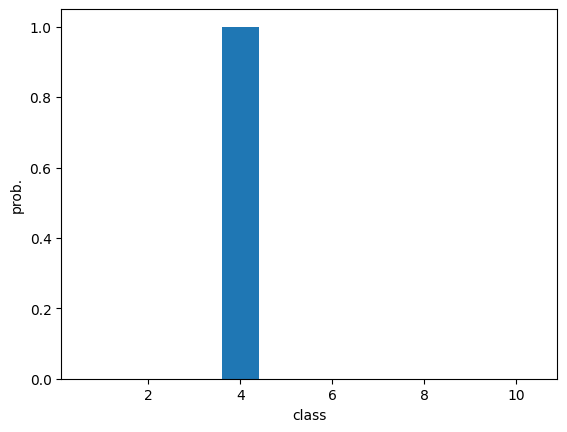

In [22]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [23]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [24]:
import numpy as np

print(classes[np.argmax(preds)])

드레스


In [25]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [26]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.2493 - accuracy: 0.9107


[0.24927201867103577, 0.9107000231742859]